In [16]:
import os
os.chdir("C:/Program Files/Stata18/utilities")
from pystata import config
config.init("mp")

## Problem 1
The goal of this exercise is to observe heteroskedasticity on simulated data.

1. Draw $x_1 \sim \mathcal{N}(2,3),aux \sim \mathcal{N}(0,1), n=10000$ times and generate $u=2x_1 \times aux, y=2+3x_1+u$.

In [17]:
%%stata -qui
clear
cd "D:\My Drive\Sciences Po\Spring 2025\Econometrics\HW\ScPo_M1_Econometrics2\HW6"
set obs 10000
*Generte x_1
gen x_1 = 2 + (3 - 2)*runiform()
*Generate aux
gen aux = runiform()
*Generate u
gen u = 2 * x_1 * aux
*Generate y
gen y = 2 + 3 * x_1 + u

2. Regress $y$ on $x_1$. Show a scatter plot of the regression residuals on $x_1$. What do you observe?

In [18]:
%%stata
*Regree y on x_1
reg y x_1


. *Regree y on x_1
. reg y x_1

      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(1, 9998)      =   6486.05
       Model |  13588.0672         1  13588.0672   Prob > F        =    0.0000
    Residual |  20945.4947     9,998  2.09496846   R-squared       =    0.3935
-------------+----------------------------------   Adj R-squared   =    0.3934
       Total |  34533.5619     9,999  3.45370156   Root MSE        =    1.4474

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         x_1 |   4.031324   .0500562    80.54   0.000     3.933204    4.129444
       _cons |   1.902178   .1259601    15.10   0.000     1.655271    2.149085
------------------------------------------------------------------------------

. 



. *Get residuals
. predict res_1, resid

. * Plot residuals vs x_1
. scatter res_1 x_1, title("Residuals vs x_1") ytitle("Residuals") xtitle("x_1"
> ) legend(off)

. 


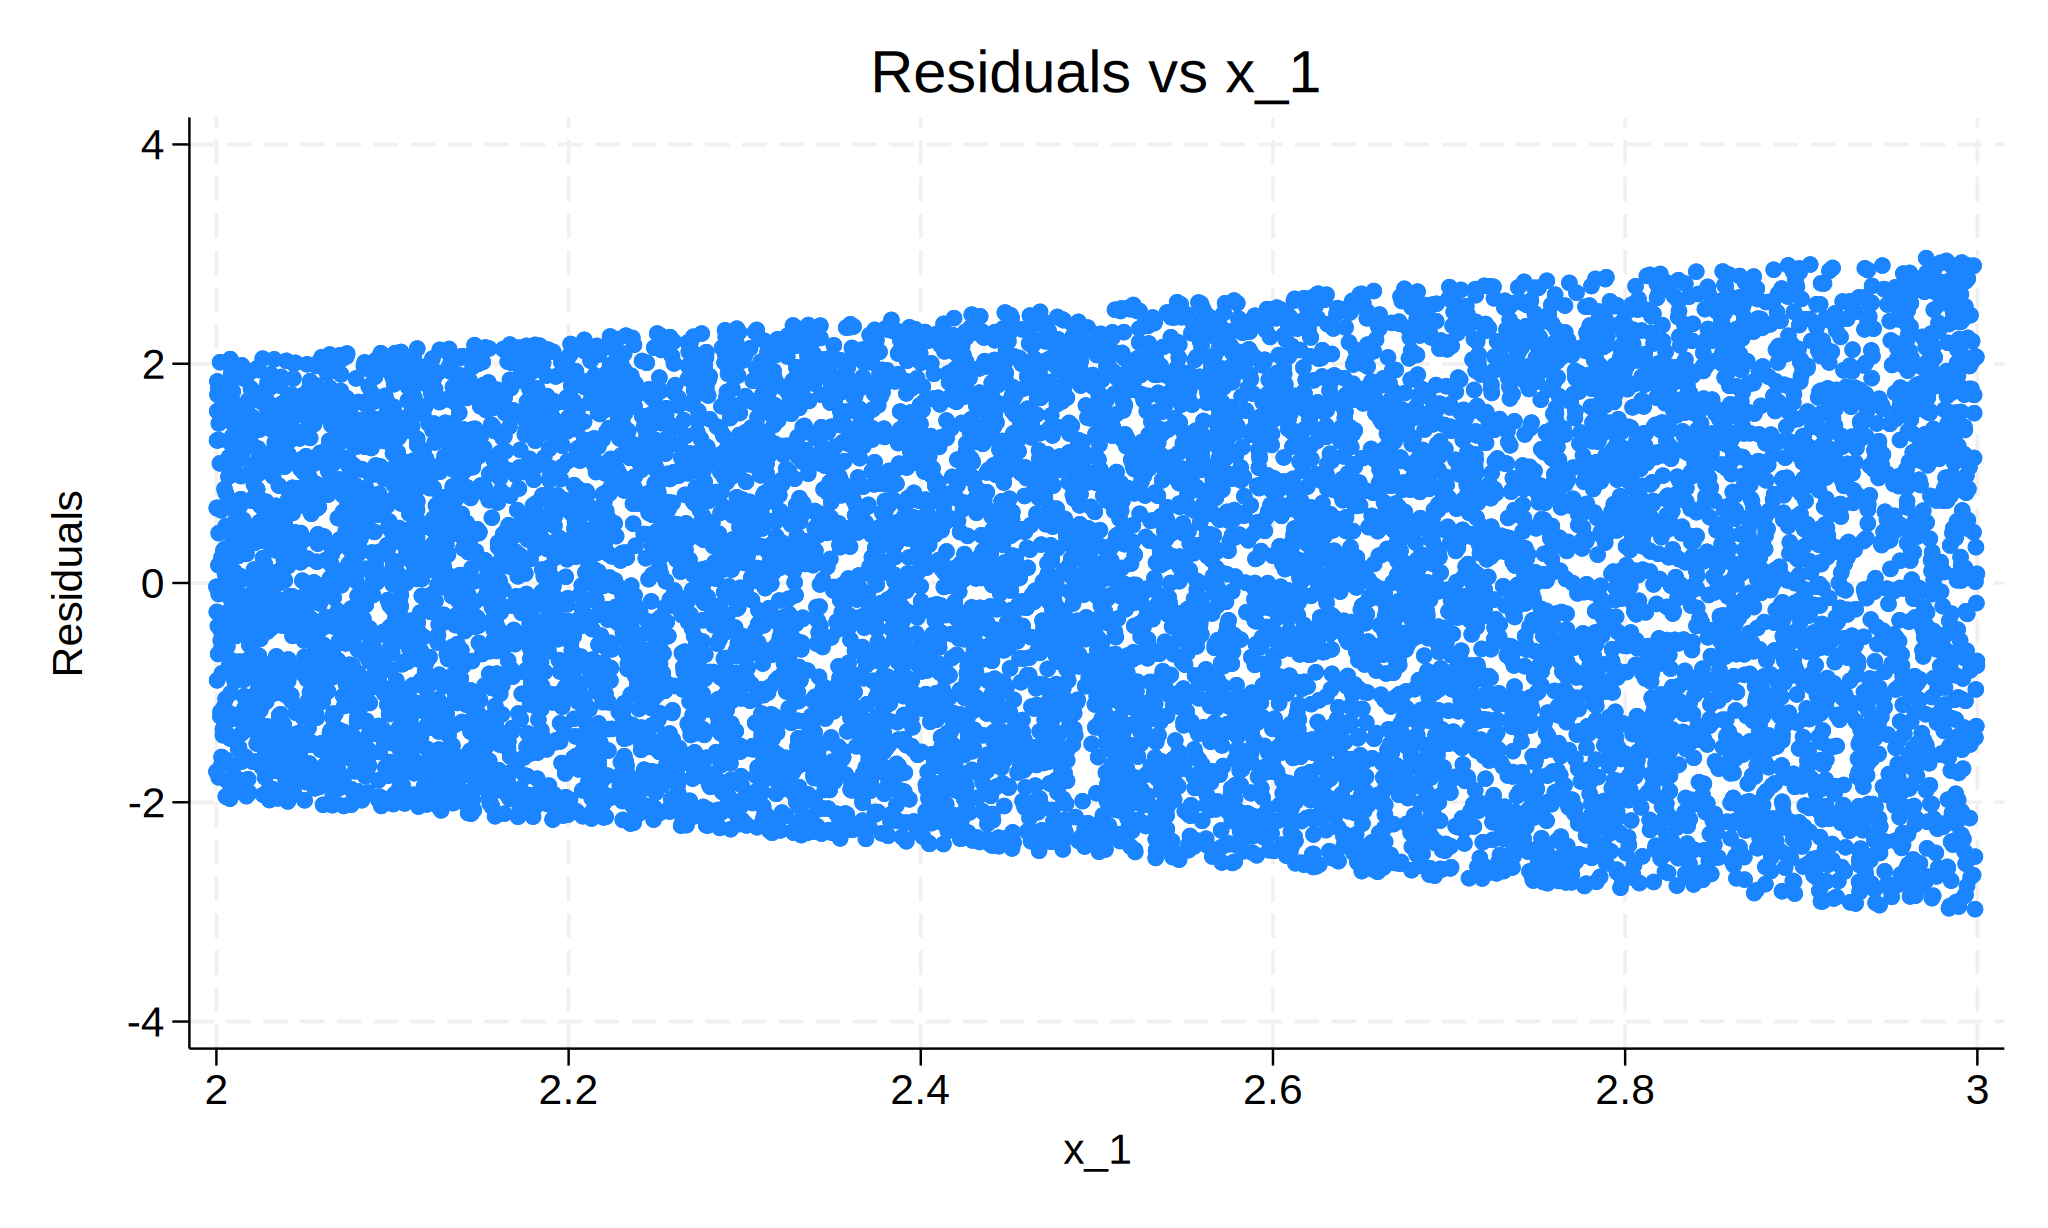

In [19]:
%%stata
*Get residuals
predict res_1, resid
* Plot residuals vs x_1
scatter res_1 x_1, title("Residuals vs x_1") ytitle("Residuals") xtitle("x_1") legend(off)


3. The White test aims at testing for heteroscedasticy. Its null hypothesis is $H_0:\sigma_i=\sigma_j \forall i, j$. Follow these steps to perform a White test:

    (a) Obtain predicted values $\hat{y}_i$ and residuals $\hat{u}_i$ from regression in 2.

In [20]:
%%stata -qui
*Generate predicted values for $\hat{y}_i$
predict y_hat



We already have the predicted residual calculated in 2.

 (b) Estimate the following model: $\hat{u}_i=\delta_0 + \delta_1 \hat{y}_i+ \delta_2 \hat{y}_i^2$. Call $R_\epsilon^2$ its R-squared.

In [21]:
%%stata
quietly {
    * Generate squared variables
    generate res_1_sq = res_1^2
    generate y_hat_sq = y_hat^2
}
* Run the regression
regress res_1_sq y_hat y_hat_sq


. quietly {

. * Run the regression
. regress res_1_sq y_hat y_hat_sq

      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(2, 9997)      =    269.29
       Model |  1978.49402         2  989.247012   Prob > F        =    0.0000
    Residual |  36724.7762     9,997  3.67357969   R-squared       =    0.0511
-------------+----------------------------------   Adj R-squared   =    0.0509
       Total |  38703.2702     9,999  3.87071409   Root MSE        =    1.9167

------------------------------------------------------------------------------
    res_1_sq | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       y_hat |   .1813658     .37726     0.48   0.631    -.5581399    .9208714
    y_hat_sq |   .0083576   .0157408     0.53   0.595    -.0224975    .0392128
       _cons |  -1.288793   2.243511    -0.57   0.566    -

(c) Under $H_0$ , the $nR_\epsilon^2$ statistics follows a $\mathcal{X}^2(2)$. Display the test threshold at the $5%$ level. What can you conclude.

In [24]:
%%stata
quietly {
    * save R-squared
scalar r2_val = e(r2)
}
* display the critical value
display invchi2(2, 0.95)
* generate nR^2
scalar nR2 = _N *r2_val
display nR2 


. quietly {

. * display the critical value
. display invchi2(2, 0.95)
5.9914645

. * generate nR^2
. scalar nR2 = _N *r2_val

. display nR2 
511.19557

. 


Since the stats is greater than the critical value, we can reject the null hypothesis that the regression has homoskedasticity.

(d) Perform the test directly using command imtest in Stata

In [25]:
%%stata
estat imtest, white


White's test
H0: Homoskedasticity
Ha: Unrestricted heteroskedasticity

    chi2(4) = 1094.67
Prob > chi2 =  0.0000

Cameron & Trivedi's decomposition of IM-test

--------------------------------------------------
              Source |       chi2     df         p
---------------------+----------------------------
  Heteroskedasticity |    1094.67      4    0.0000
            Skewness |    1530.70      2    0.0000
            Kurtosis |     142.79      1    0.0000
---------------------+----------------------------
               Total |    2768.16      7    0.0000
--------------------------------------------------


As the p-value = 0, we can also reject the null hypothesis that there is homoskedasticity.

4. How can you account for heteroskedasticity directly in the original regression?Perform the regression with the relevant option. Are coefficients’s standard error larger or smaller when accounting for heteroskedasticity?

In [26]:
%%stata
reg y x_1, robust


Linear regression                               Number of obs     =     10,000
                                                F(1, 9998)        =    6474.81
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3935
                                                Root MSE          =     1.4474

------------------------------------------------------------------------------
             |               Robust
           y | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         x_1 |   4.031324   .0500996    80.47   0.000     3.933119    4.129529
       _cons |   1.902178   .1229802    15.47   0.000     1.661112    2.143244
------------------------------------------------------------------------------


We can just use the robust option to account for the heteroskedasticity in the original regression. Due to the presense of heteroskedasticity, it is expected the robust standard error will be larger than the normal one and it is indeed the case shown in the results above.
